In [11]:
# load libraries
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [1]:
# function to create the standard errors for the subset model estimates
confidence_interval <- function(vector, interval) {
  # Standard deviation of sample
  vec_sd <- sd(vector)
  # Sample size
  n <- length(vector)
  # Mean of sample
  vec_mean <- mean(vector)
  # Error according to t distribution
  error <- qt((interval + 1)/2, df = n - 1) * vec_sd / sqrt(n)
  # Confidence interval as a vector
  result <- c("lower" = vec_mean - error, "upper" = vec_mean + error)
  return(result)
}

In [3]:
# get RDS fils containing a list for the each ME model output. Reactions: outputs for the estimators
list_of_reactions <- readRDS("./baseline_novote_all/list_of_reactions.RDS")


In [4]:
# aggregate data
df_of_reactions <- as.data.frame(do.call(rbind, list_of_reactions))
head(df_of_reactions)

,x,predicted,std.error,conf.low,conf.high,group,group_col
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,deliberation,0.13859203,0.06498196,0.01122973,0.26595433,baseline,baseline
2,deliberation,0.11246971,0.06695728,-0.01876416,0.24370358,no_votes,no_votes
3,demagoguery,-0.08127970,0.06498196,-0.20864200,0.04608260,baseline,baseline
4,demagoguery,-0.07396468,0.06695728,-0.20519855,0.05726919,no_votes,no_votes
5,civic,0.06838787,0.06498196,-0.05897443,0.19575017,baseline,baseline
6,civic,0.05564768,0.06695728,-0.07558619,0.18688155,no_votes,no_votes


In [5]:
# calculate confidence intervals and mean estimators
df_reactions <- cbind.data.frame(aggregate(.~x+group, df_of_reactions,mean),aggregate(.~x+group, df_of_reactions[,c(1,2,6)],function(x) confidence_interval(x, 0.95))$predicted)

In [6]:
# format and rename data
df_reactions$group <- as.character(df_reactions$group)
df_reactions$group[df_reactions$group=='upvote_only'] <- 'only upvotes'
df_reactions$group[df_reactions$group=='no_votes'] <- 'no votes'
df_reactions$group[df_reactions$group=='baseline'] <- 'up/downvotes'

In [7]:
df_reactions

x,group,predicted,std.error,conf.low,conf.high,group_col,lower,upper
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
civic,up/downvotes,0.06832178,0.06677906,-0.062562787,0.19920634,1,0.06133132,0.07531223
deliberation,up/downvotes,0.13982975,0.06677906,0.008945184,0.27071431,1,0.12727523,0.15238426
demagoguery,up/downvotes,-0.05962161,0.06677906,-0.190506176,0.07126295,1,-0.06593625,-0.05330698
civic,no votes,0.04937565,0.06871755,-0.085308267,0.18405957,2,0.04165828,0.05709303
deliberation,no votes,0.10424134,0.06871755,-0.030442576,0.23892526,2,0.09077334,0.11770935
demagoguery,no votes,-0.04636325,0.06871755,-0.181047171,0.08832067,2,-0.05326927,-0.03945724


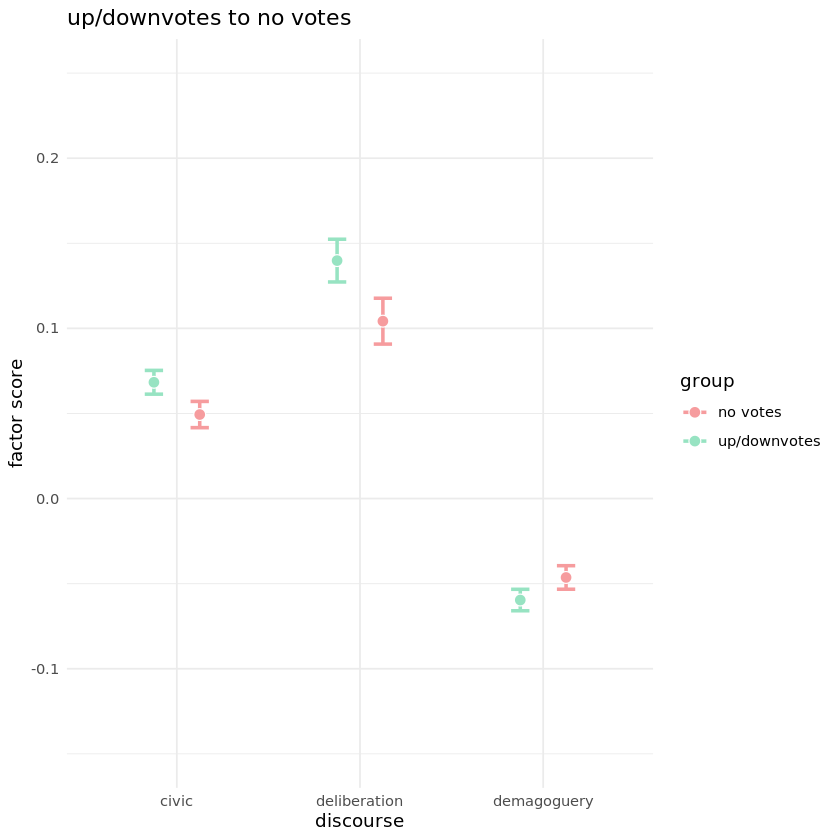

In [12]:
# generate plot
q <- ggplot(data=df_reactions, mapping=aes(x=x, y = predicted, ymin=upper, ymax=lower, col=group,fill=group, group = desc(group)), width=0.02, size=0.1, color="#97E3C2") +
  geom_errorbar(size=1,position=position_dodge(width = 0.5), width = 0.2) + 
  scale_fill_manual(values=c( "#f69c9e", "#97E3C2")) +
  scale_color_manual(values=c( "#f69c9e","#97E3C2")) +
  theme_minimal() +
  geom_point(size=3, shape=21, colour="white", stroke = 0.5,position=position_dodge(width = 0.5)) +
  xlab("discourse") + ylab("factor score") + ggtitle('up/downvotes to no votes') +   ylim(-0.15, 0.25)
 #+ theme(text=element_text(size=13)) + theme(aspect.ratio = 0.7)
ggsave(plot = q, width = 5, height = 3, dpi = 300, filename = "baseline_novote.png") 
q